<h1><b>Titanic - Machine Learning from Disaster</b></h1>

<h2><b>Equipo 5</b></h2>
Cleber Gerardo Pérez Galicia - A01236390 <br>
Juan Pablo Bernal Lafarga - A01742342 <br>
Jacobo Hirsch Rodríguez - A00829679 <br>
Eryk Elizondo González - A01284899 <br>





<h2><b>Descripción</b></h2>
El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado “insumergible”, se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que provocó la muerte de 1,502 de los 2,224 pasajeros y tripulantes.

Si bien hubo algún elemento de suerte involucrado en la supervivencia, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, se construye un modelo predictivo que responda a la pregunta: "¿qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de los pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

<h2><b>Objetivo</b></h2>
Utilizar el aprendizaje automático para crear un modelo que prediga qué pasajeros sobrevivieron al naufragio del Titanic.

# Análisis Inicial

## Montar Dataset Dependiendo del Usuario

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Cleber Gerardo Pérez Galicia
# %cd "/content/gdrive/MyDrive/TC3006_7C_101_E5/Titanic/Datasets"

In [ ]:
# Juan Pablo Bernal Lafarga
# %cd "/content/gdrive/MyDrive/TC300_Titanic"

In [ ]:
# Jacobo Hirsch Rodríguez
#%cd "/content/gdrive/MyDrive/SeptimoSemestre/titanicDataset"

/content/gdrive/MyDrive/SeptimoSemestre/titanicDataset


In [ ]:
# Eryk Elizondo González
%cd "/content/gdrive/MyDrive/ColabNotebooks/TC3006_7C_101_E5/Titanic/Datasets"

/content/gdrive/MyDrive/ColabNotebooks/TC3006_7C_101_E5/Titanic/Datasets


## Extracción de Datos

In [ ]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

### Archivo de Entrenamiento

In [ ]:
# Abrir archivo de entrenamiento
train_data = pd.read_csv('train.csv')

# Desplegar información superficial
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Desplegar primeros datos
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Observamos que los datos representan un listado de los pasajeros del Titanic, incluyendo su nombre, información de su pasaje y si sobrevivieron o fallecieron en la trajedia.
- Hay 12 columnas
- Hay 3 columnas que le faltan datos: Age, Cabin & Embarked

### Archivo de Prueba

In [ ]:
# Abrir archivo de prueba
test_data = pd.read_csv('test.csv')

# Desplegar información superficial
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# Desplegar primeros datos
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Vemos similitudes en los datos de prueba a los datos de entrenamiento.
- Hay 11 columnas, no incluye la de Survived que es la que se va a predecir con el modelo.
- Igualmnete hay 3 columnas que le faltan datos: Age, Cabin & Embarked.

In [ ]:
# Descripción general de las columnas numéricas
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# Porcentaje de datos faltantes por columna
print(round(train_data.isnull().sum().sort_values(ascending=False)/len(train_data)*100,2))

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64


Considerando que más del 77% de los datos de Cabin están faltantes, no la podremos usar para el modelo ya que nos generará demasiado ruido intentar llenar esos datos faltantes.

Para considerar la utilidad de las demás variables analizaremos cada una más a detalle.

# Análisis de Variables

## PassengerId


PassengerId es una columna de identificador primario para las tuplas, no nos servirá para el análisis.

<h4><b>PassengerId</b></h4>
PassengerId es una columna de identificador primario para las tuplas, no nos servirá para el análisis, más que para contar el número completo de pasajeros en la muestra.

<h4><b>Survived</b></h4>
Survived es la columna más importante para el análisis ya que nos indica si es que la persona falleció (0) o sobrevivió (1) lo cual es escencial para cumplir el objetivo. Es una columna de tipo entero con 2 valores binarios. No hay datos faltantes en la muestra.

In [ ]:
num_survived = train_data.groupby('Survived')['Survived'].count()[0]
print("Número de Sobrevivientes:", num_survived)
num_deceased = train_data.groupby('Survived')['Survived'].count()[1]
print("Número de Fallecidos:", num_deceased)
print("Procentaje de Supervivencia:", round((num_survived) / (num_survived + num_deceased) * 100, 2), "%")
print("Procentaje de Fallecimiento:", round((num_deceased) / (num_survived + num_deceased) * 100, 2), "%")

Número de Sobrevivientes: 549
Número de Fallecidos: 342
Procentaje de Supervivencia: 61.62 %
Procentaje de Fallecimiento: 38.38 %


En la muestra, 61.6% o 549 de los pasajeros sobrevivieron, mientras que 38.4% o 342 no sobrevivieron.

<h4><b>Pclass</b></h4>
La variable "Pclass" es una variable categórica con 3 resultados.<br>

1.   Pasajero de clase alta<br>
2.   Pasajero de clase media<br>
3.   Pasajero de clase baja<br>

Es una variable con 891 datos registrados y es de tipo int64. El rango de valores va de 1 a 3.

<Axes: xlabel='Pclass', ylabel='Count'>

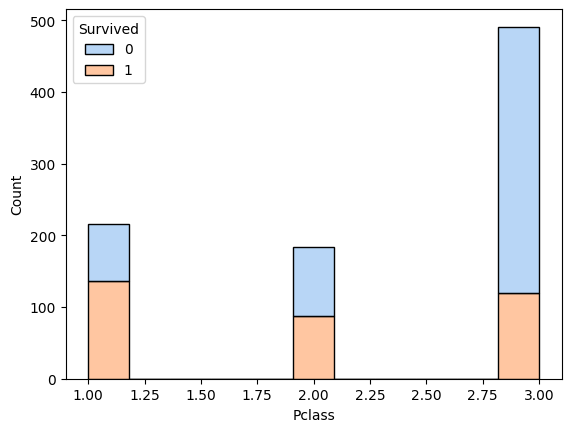

In [ ]:
sns.histplot(x = 'Pclass', hue = 'Survived', data = train_data, multiple='stack', palette='pastel')

In [ ]:
train_data.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

Hay 216 personas en la clase 1, 184 en la clase 2 y 491 en la clase 3.
Los supervivientes y muertos por clase son:

	Clase 1: 80 bajas y 136 supervivientes (El 62.96% de los pasajeros de la clase 1 sobrevivieron)
	Clase 2: 97 bajas y 87 supervivientes (El 47.48% de los pasajeros de la clase 2 sobrevivieron)
	Clase 3: 372 bajas y 119 supervivientes (El 24.36% de los pasajeros de la clase 3 sobrevivieron)

Con esta información podemos concluir que la probabilidad de supervivencia de acuerdo a tu clase aumenta conforme más alta sea. Las personas de clase 1 tienen casi el triple de probabilidades de sobrevivir que una pasajero de 3ra. clase.

<h4><b>Name</b></h4>
Name es una columna que indica el nombre del pasajero, como todos los nombres son distintos y los apellidos que se repiten son representados con sibsp o parch esta variable no nos servirá para el análisis.

<h4><b>Sex</b></h4>


vamos a analizar la variable sexo ya que se podría considerar que es de las variables mas importantes. Esta variable es una variable categorica nominal ya que no se considera que tenga alguna jerarquia implicita. Lo primero que necesitamos saber revisar si existen datos nulos del total de datos.

In [ ]:
nulos_sex = train_data['Sex'].isnull().sum()

# Muestra la cantidad de valores nulos
print(f'La columna "sex" tiene {nulos_sex} valores nulos.')

La columna "sex" tiene 0 valores nulos.


una vez que nos aseguramos que no tiene datos nulos o la cantidad es irrelevante, vamos a ver como se distribuye la informacion, es decir cuantos hombres y cuantas mujeres hay

In [ ]:
train_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


podemos saber el porcentaje de supervivencia de entre hombres y mujeres, esto es posible por que groupby separa nuestro dataset en dos conjuntos de Sex, lo empata con la columna survived y obtiene el promedio al final, esto es posible gracias a que survived es una variable categorica (0 or 1), si todos sobreviven en una categoría la media es 1, si nadie sobrevive la media es 0, es un grupo sobrevivio es un valor entre 0 y 1.

In [ ]:
survived_by_sex = train_data.groupby('Sex')['Survived'].mean()
print(survived_by_sex)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Ahora vamos a graficarlo

Text(0, 0.5, 'Número de Supervivientes')

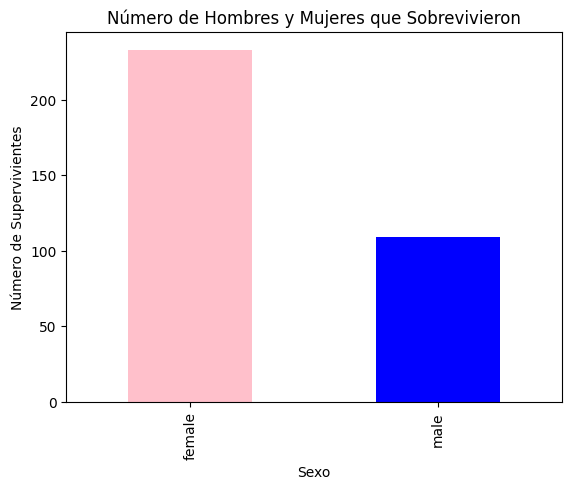

In [ ]:
# crea un dataframe donde lo filtras por la etiqueta survived == 1
survived = train_data[train_data['Survived'] == 1]


# Cuenta la cantidad de hombres y mujeres que sobrevivieron
survived_count = survived['Sex'].value_counts()

# Crea una gráfica de barras
survived_count.plot(kind='bar', color=['pink', 'blue'])

# Agrega un título y etiquetas a los ejes
plt.title('Número de Hombres y Mujeres que Sobrevivieron')
plt.xlabel('Sexo')
plt.ylabel('Número de Supervivientes')

# Muestra la gráfica

Podemos observar en la grafica y en analisis de la media que la mayoría de las mujeres sobrevivieron a comparación de los hombres, por lo que es sensato suponer que existe una correlación entre la variable sexo y supervivencia. Vamos a comprobarlo

In [ ]:
train_data['Sex_num'] = train_data['Sex'].map({'male': 0, 'female': 1})
correlation = train_data['Sex_num'].corr(train_data['Survived'])
print(f"Correlación entre Sex y Survived: {correlation}")

Correlación entre Sex y Survived: 0.5433513806577555


<h4><b>Age</b></h4>
Age es una variable que indica la edad en años del pasajero. Es una variable de tipo flotante donde, si se estima la edad, está en la forma xx.5. Aproximadamente 20% de los datos están faltantes. Como es una variable continua se manejarán rango de edades para nuestro eje horizontal.


In [ ]:
# Rango de la variable
train_data.Age.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: xlabel='Age', ylabel='Count'>

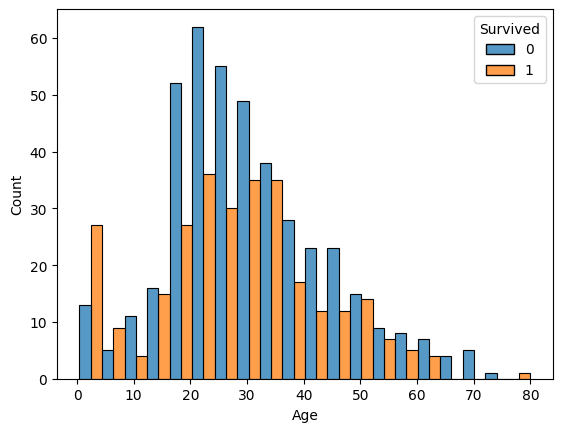

In [ ]:
# Definir rango de edad
age = train_data.dropna(subset=['Age'])
sns.histplot(age, x="Age", hue='Survived', multiple="dodge")

In [ ]:
sns.kdeplot(df, x= "Age", hue='Survived', fill=True, legend=True)

Mayor sobrevivencia abajo de 5?, mayor muerte en los 20s

<h4><b>SibSp</b></h4>
Esta variable nos indica la cantidad de relaciones familiares que tenia una persona, en esta variable agrupa a los hermanos / esposos. Dentro del analisis es importante saber si esta variable nos puede ser de utilidad ya que podemos ver si el hecho de tener mas familiares afecta a la supervivencia de las personas. Por ejemplo, si estas personas pudieron obtener ayuda de sus familiares a la hora de huir del barco o si priorizaron las supervivencia de sus seres queridos.

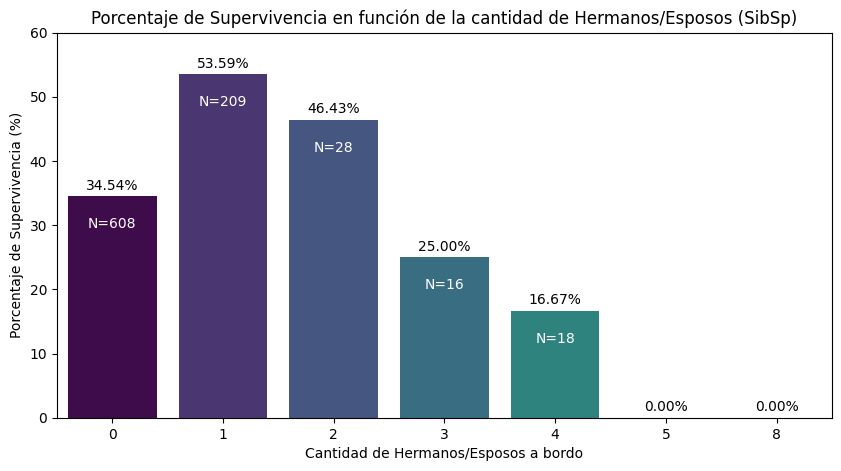

In [ ]:
# Porcentaje de supervivencia en función de SibSp
sibsp_survival = train_data.groupby('SibSp')['Survived'].mean() * 100
sibsp_counts = train_data['SibSp'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=sibsp_survival.index, y=sibsp_survival.values, palette="viridis", hue=sibsp_survival.index, dodge=False, legend=False)
plt.title('Porcentaje de Supervivencia en función de la cantidad de Hermanos/Esposos (SibSp)')
plt.xlabel('Cantidad de Hermanos/Esposos a bordo')
plt.ylabel('Porcentaje de Supervivencia (%)')

# Mostrar el número de pasajeros y el porcentaje de supervivencia por cada categoría
for i, count in enumerate(sibsp_counts):
    plt.text(i, sibsp_survival.iloc[i] + 1, f'{sibsp_survival.iloc[i]:.2f}%', ha='center')
    plt.text(i, sibsp_survival.iloc[i] - 5, f'N={count}', color='white', ha='center')

plt.ylim(0, 60)
plt.show()

De la siguiente tabla podemos observar que si existe un aumento en el porcentaje de supervivencia en las personas que tengan almenos 1 o mas hermanos/esposos, aunque podemos observar un decremento si la cifra sube a mas de 2.

<h4><b>Parch</b></h4>
Esta variable es parecida a la anterior ya que mide tambien los familiares de las personas, pero esta es en base de si son hijos / padres.


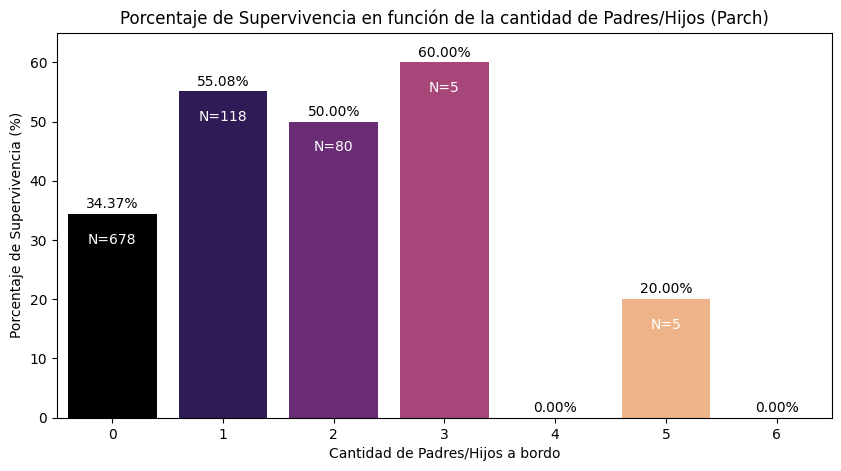

In [ ]:
# Porcentaje de supervivencia en función de Parch
parch_survival = train_data.groupby('Parch')['Survived'].mean() * 100
parch_counts = train_data['Parch'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=parch_survival.index, y=parch_survival.values, palette="magma", hue=parch_survival.index, dodge=False, legend=False)
plt.title('Porcentaje de Supervivencia en función de la cantidad de Padres/Hijos (Parch)')
plt.xlabel('Cantidad de Padres/Hijos a bordo')
plt.ylabel('Porcentaje de Supervivencia (%)')

# Mostrar el número de pasajeros y el porcentaje de supervivencia por cada categoría
for i, count in enumerate(parch_counts):
    plt.text(i, parch_survival.iloc[i] + 1, f'{parch_survival.iloc[i]:.2f}%', ha='center')
    plt.text(i, parch_survival.iloc[i] - 5, f'N={count}', color='white', ha='center')

plt.ylim(0, 65)
plt.show()

Podemos observar que como en el anterior caso, el porcentaje de supervivientes se ve incrementada si se tiene almenos 1 o mas familiares hijos / padres, y si la cantidad llega a a ser mas numerosa de 4 en adelante la mortalidad es mas probable.

<h4><b>FamilySize</b></h4>
Esta es una nueva variable que creamos a partir de los datos anteriores de Sibsp y Parch, esto para obtener mejores datos para saber la cantidad de integrantes de familia que tiene cada persona dentro del titanic, para esto se calculo de siguiente manera: Sibsp + Parch + 1, este ultimo uno para incluir a la persona a su familia.

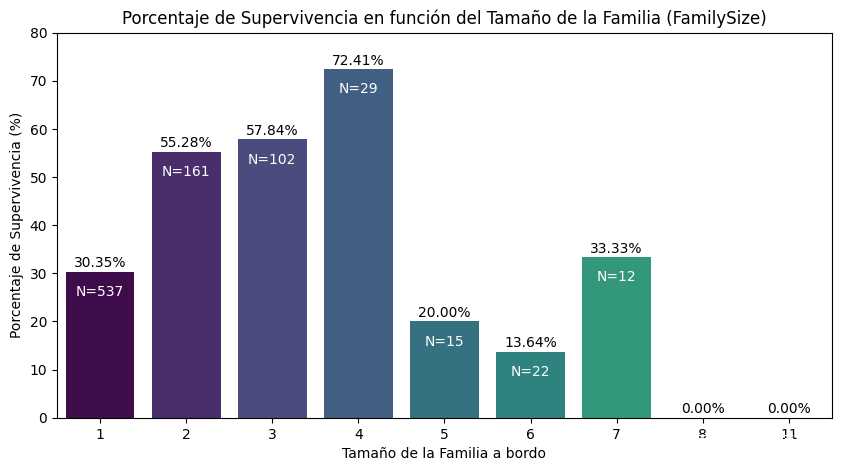

In [ ]:
# Crear la columna FamilySize (SibSp + Parch + 1 para incluir al propio pasajero)
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Calcular el porcentaje de supervivencia para cada tamaño de familia
family_survival = train_data.groupby('FamilySize')['Survived'].mean() * 100

# Contar el número de pasajeros para cada tamaño de familia
family_counts = train_data['FamilySize'].value_counts().sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=family_survival.index, y=family_survival.values, palette="viridis", hue=family_survival.index, dodge=False, legend=False)
plt.title('Porcentaje de Supervivencia en función del Tamaño de la Familia (FamilySize)')
plt.xlabel('Tamaño de la Familia a bordo')
plt.ylabel('Porcentaje de Supervivencia (%)')

# Mostrar el número de pasajeros y el porcentaje de supervivencia por cada categoría en las barras
for i, count in enumerate(family_counts):
    plt.text(i, family_survival.iloc[i] + 1, f'{family_survival.iloc[i]:.2f}%', ha='center')
    plt.text(i, family_survival.iloc[i] - 5, f'N={count}', color='white', ha='center')

plt.ylim(0, 80)
plt.show()

<h4><b>Ticket</b></h4>
Ticket es una columna que nos indica el número de ticket del pasajero, como ya tenemos una cuenta de los pasajeros e información de su clase no nos sirve para el análisis.

<h4><b>Fare</b></h4>
Fare es una columna que nos indica el costo que pagó cada pasajero para subirse al Titanic, como los datos no están respaldados con equivalencias, como tal lugar o persona costaba más y como algunas tuplas están en $0.00 no nos va a servir para el análisis.

<h4><b>Cabin</b></h4>
Cabin es una columna que nos indica el número de cabina del pasajero. Aunque este dato nos puede ayudar a ubicar geográficamente a cada pasajero en el Titanic lo cual puede influir en la tasa de mortalidad, faltan el 77% de los datos para los pasajeros. Como existe una enorme falta de información para esta columna, no sería posible realizar un modelo con un error bajo debido a la falta de datos. Con base en lo anterior, esta variable no nos será de utilidad.

<h4><b>Embarked</b></h4>
Embarked es una columna que nos indica de qué puerto embarcó cada pasajero, sin embargo, los datos no indican ninguna correlación con la tasa de mortalidad, entonces no servirá esta variable.

## Predicción de supervivencia utilizando regresión lineal simple con la variable "Sex"

Primero, transformamos la columna "Sex" de strings a ints.

In [ ]:

label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])

A continuación, se llaman los paquetes y librerías necesarias, que en este caso se utiliza sklearn y statsmodels.
Además, inicializamos un modelo con la variable dependiente (Survived) y la variable independiente (Sex).

In [ ]:


# División de los datos en train y test
# ==============================================================================
X = train_data['Sex']
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

Aquí se calcula el intercepto y coeficiente de la eucación de regresión y = m*x + b. Y además, se calcula la eficiencia del modelo, que es el coeficiente R^2.

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X.array.reshape(-1,1), y))

Intercept: [0.72265625]
Coeficiente: [(1, -0.5318667763157882)]
Coeficiente de determinación R^2: 0.29466126800890324


Ahora, tenemos el error medio cuadrático del modelo.

In [ ]:
# Error de test del modelo
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[0.72265625]
 [0.19078947]
 [0.19078947]]

El error (rmse) de test es: 0.38783309923200737


Cargamos la base de datos de prueba, la cual no tiene la columna "Survived"

In [ ]:
datatest = pd.read_csv('test.csv')
datatest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Mediante el modelo entrenado y los datos de la base de datos "test", obtenemos las predicciones sobre los nuevos pasajeros.

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
label_encoder = LabelEncoder()
datatest['Sex'] = label_encoder.fit_transform(datatest['Sex'])
predicciones = np.round(modelo.predict(datatest['Sex'].array.reshape(-1,1)),0)

Aquí se crea el DataFrame con el PassengerId de los nuevos pasajeros y la predicción de si sobrevivieron o no.

In [ ]:
datanew = pd.DataFrame(index=range(418))
datanew['PassengerId'] = datatest['PassengerId']
datanew['Survived'] = predicciones
datanew.head()

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0


Dada la eficiencia del modelo y la naturaleza de la regresión lineal, podemos concluir que este modelo no es el necesario ni el adecuado para la clasificación correcta de la supervivencia de los pasajeros porque es un problema de clasificación binaria, no de predicción continua. Para estos casos, modelos de clasificación como la regresión logística son más adecuados y proporcionarán mejores resultados.

## Predicción con porcentajes de clases

In [ ]:
# Crear rangos de edad
# https://www.researchgate.net/figure/Age-intervals-and-age-groups_tbl1_228404297#:~:text=Meanwhile%2C%20it%20is%20worth%20noting,)%20and%20old%20(60%20%2B).
# Bebé: 0-1 años
# Niño pequeño: 2-4 años
# Niño: 5-12 años
# Adolescente: 13-17 años
# Joven Adulto: 18-24 años
# Adulto: 25-34 años
# Mediana Edad: 35-54 años
# Mayor: 55-64 años
# Anciano: 65+ años

# Separar rangos de edad
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 1, 4, 12, 17, 24, 34, 54, 64, 100], labels=['Bebé', 'Niño pequeño', 'Niño', 'Adolescente', 'Joven Adulto', 'Adulto', 'Mediana Edad', 'Mayor', 'Anciano'])

# Calcular probabilidades de supervivencia por género, clase y grupo de edad comparando sobrevivientes/fallecidos/Total
probabilidades_sobrevivencia = (
    train_data.groupby(['Sex', 'Pclass', 'AgeGroup'])['Survived']
    .agg(lambda x: x.sum() / len(x) if len(x) > 0 else 0)
    .to_dict()
)

# Definimos umbral para decidir si predecimos supervivencia o no
umbral = 0.5

# Función para convertir edad a grupo
def convertir_edad_a_grupo(edad):
    if edad < 0:
        raise ValueError("La edad no puede ser negativa")
    elif edad <= 1:
        return 'Bebé'
    elif edad <= 4:
        return 'Niño pequeño'
    elif edad <= 12:
        return 'Niño'
    elif edad <= 17:
        return 'Adolescente'
    elif edad <= 24:
        return 'Joven Adulto'
    elif edad <= 34:
        return 'Adulto'
    elif edad <= 54:
        return 'Mediana Edad'
    elif edad <= 64:
        return 'Mayor'
    else:
        return 'Anciano'

# Función para predecir la supervivencia basada en género, clase y edad
def predecir_sobrevivencia(genero, clase, edad):
    grupo_edad = convertir_edad_a_grupo(edad)
    probabilidad = probabilidades_sobrevivencia.get((genero, clase, grupo_edad), 0)
    return 1 if probabilidad > umbral else 0

# Probamos modelo
dft = pd.DataFrame(pd.read_csv('test.csv'))
dft['Survived'] = dft.apply(lambda row: predecir_sobrevivencia(row['Sex'], row['Pclass'], row['Age']), axis=1)
dft[['PassengerId','Survived']]

<ipython-input-32-8989701fbeea>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data.groupby(['Sex', 'Pclass', 'AgeGroup'])['Survived']


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


# Predicción utilizando regresión logistica

la siguiente función "logistic_reg" recibe los siguiente parametros: iterations (número de iteraciones, th0 (el primer parametro), th1 (es el segundo parametro), alfa (el hiperparametro) y los arreglos x_arr que representa las entradas o la variable independiente y y_arr que representa las salidas o la variable dependiente. Se asume que nuestra función de hipotesis se presenta externamente como f, siendo f una función lambda. La función regresa una tupla con los valores estimados de th0 y th1 para predecir los valores.

In [ ]:
# Por convencion se colocan los parametros dentro de un array
# Valores de theta 0 y theta 1 respectivamente
parametros = np.array([-5,0.1], dtype= float)


def log_loss(y_true, y_pred):
    # Evitar el logaritmo de cero agregando un pequeño valor epsilon.
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Cálculo del log-loss
    cost = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return cost



# Crear función lambda para la función de hipótesis
f = lambda th0 , th1, x : 1 / (1 + np.exp(-1*(th0+th1*x)))


def logistic_reg(iterations, th0, th1, alfa, x_arr, y_arr):
    n = x_arr.size
    delta0 = np.zeros(n)
    delta1 = np.zeros(n)
    cost_history = []

    for _ in range(iterations):

        # en cada iteración se calcula con los parametros correspondientes la predicción de y
        y_pred = np.array([f(th0, th1, x) for x in x_arr])

        for i in range(n):
            delta0[i] = f(th0, th1, x_arr[i]) - y_arr[i]
            delta1[i] = delta0[i] * x_arr[i]

        th0 -= alfa * np.mean(delta0)
        th1 -= alfa * np.mean(delta1)

        # Calcular y almacenar la función de costo log-loss en cada iteración
        cost = log_loss(y_arr, y_pred)
        cost_history.append(cost)

    return th0, th1, cost_history

vamos a crear nuestros arrays que contendrán nuestro x_arr y y_arr de la función. El método to_numpy() cambia el tipo de datos series de pandas a un array de numpy.

In [ ]:
x_train = train_data["Sex_num"].to_numpy()
y_train = train_data["Survived"].to_numpy()

x_train_one, x_test_one, y_train_one, y_test_one = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

evaluamos con nuesta información, en donde haremos 1000 iteraciones, definimos arriba th0 como -5 y th1 como 0.1 que extraemos del array definido anteriormente, definimos alfa como 0.1 e insertamos los arrays de x_test1 y y_test1

In [ ]:
new_th0, new_th1, cost_history =logistic_reg(1000,parametros[0],parametros[1],0.1, x_train_one , y_train_one)

Bien, necesitamos un lugar donde guardar nuestras predicciones ya que ahora podemos utilizar nuestros valores de theta0 y theta1, por lo que necesitamos una función que nos regrese dichas predicciones.

In [ ]:
# Función de hipótesis con los parámetros aprendidos
def predict(th0, th1, x):
    return 1 / (1 + np.exp(-1 * (th0 + th1 * x)))

# Calcular las predicciones para el conjunto de prueba
predicciones = predict(new_th0, new_th1, x_test_one)

#como devuelve un valor entre 0 y 1 representativo de la probabilidad, vamos a convertirlo a un array booleano
# true si es mayor a un umbral de 0.5 y luevo convertir dicho valor a int
predicciones = (predicciones >= 0.5).astype(int)

ahora que tenemos nuestra función, podemos utilizarla para poder predecir algunos valores, el único problema es que no tenemos forma de poder predecir que tan bien o que tan mal se esta comportando por lo que necesitaremos herramientas para poder hacer dichos juicios de valor. Estas herramientas son las siguientes métricas: Exactitud, Precisión, Exhaustividad y F1-Score.

Si vemos en la definición de estas métricas podemos observas que necesitamos comparar los resultados estimados con los reales y obtener los verdaderos positivos *(VP)* , verdaderos negativos* (VN)*, falsos positivos *(FP)* y falsos negativos *(FN)*.

**Cálculo de la matriz de confusión **

In [ ]:
#se asume que los valores de entrada son arrays de numpy

def matriz_de_confusion(y_true, y_pred):

  array = np.zeros(4, dtype=int) #array[0] = VP, array[1] = VN, array[2] = FP, array[3] = FN

  # Verdaderos positivos (VP)
  VP = np.sum((y_pred == 1) & (y_true == 1))

  # Verdaderos negativos (VN)
  VN = np.sum((y_pred == 0) & (y_true == 0))

  # Falsos positivos (FP)
  FP = np.sum((y_pred == 1) & (y_true == 0))

  # Falsos negativos (FN)
  FN = np.sum((y_pred == 0) & (y_true == 1))

  array[0] = VP
  array[1] = VN
  array[2] = FP
  array[3] = FN

  return array


***Exactitud ***

se define como el total de aciertos sobre el total, en otras palabras es:
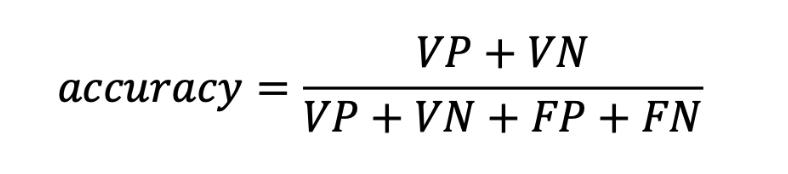

In [ ]:
def exactitud(matriz_de_confusion):

  total_de_aciertos = matriz_de_confusion[0]+matriz_de_confusion[1]
  total = np.sum(matriz_de_confusion)

  return total_de_aciertos/total


**Precisión **

se define como el total de positivos correctos sobre el total de positivos. Dicho de otro modo:

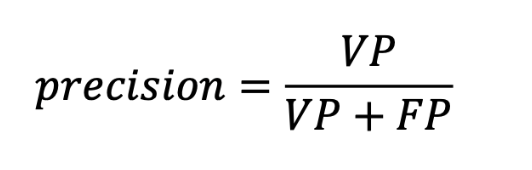

In [ ]:
def precision(matriz_de_confusion):

  total_de_positivos_correctos = matriz_de_confusion[0]
  total_de_positivos = matriz_de_confusion[0]+matriz_de_confusion[2]

  return total_de_positivos_correctos / total_de_positivos


**Exhaustividad **

se define como el total de positivos correctos sobre el total de positivos reales. Dicho de otro modo: 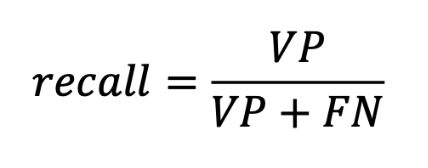

In [ ]:
def exhaustividad(matriz_de_confusion):

  total_de_positivos_correctos = matriz_de_confusion[0]
  total_de_positivos_reales = matriz_de_confusion[0]+matriz_de_confusion[3]

  return total_de_positivos_correctos/total_de_positivos_reales

**F1-Score **

Se combina la precisión y la exhausitividad en un solo indicador, podemos calcularlo de la siguiente manera:

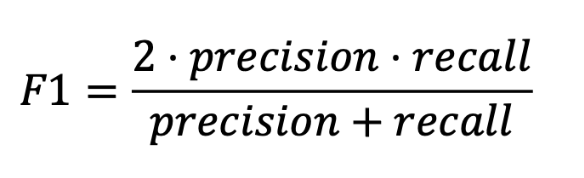

In [ ]:
def f1_score(matriz_de_confusion):

  dividendo = 2 * precision(matriz_de_confusion) * exhaustividad(matriz_de_confusion)
  divisor = precision(matriz_de_confusion) + exhaustividad(matriz_de_confusion)

  return dividendo / divisor

Hacemos el calculo de las metricas anteriores para nuestro array de predicciones:

In [ ]:
# primero tenemos que obtener la matriz de confusion
matriz_de_confusion = matriz_de_confusion(y_test_one, predicciones)

print(exactitud(matriz_de_confusion))

print(precision(matriz_de_confusion))

print(exhaustividad(matriz_de_confusion))

print(f1_score(matriz_de_confusion))

0.7847533632286996
0.7411764705882353
0.7078651685393258
0.7241379310344828
